## Ahmad Hojatimalekshah

### Collaborate: Arash Modaresi, Amir Kazemzadeh, Ali Nazari
### The collaboration was on question 8

## Midterm EXAM

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from numpy.linalg import eig
from sklearn.svm import SVC
from sklearn import tree
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
import scipy
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from itertools import cycle, islice
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from grakel.datasets import fetch_dataset
from grakel.kernels import ShortestPath
from numpy import linalg as LA

C:\ProgramData\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Q.1, Q.2

### Loading iris data

In [2]:
iris_d = sm.datasets.get_rdataset('iris')
iris = iris_d.data
iris.rename(columns=lambda x: x.replace('.', ''), inplace=True)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris=iris.drop(labels='Species', axis=1)

### Scaling the data

In [4]:
sc = StandardScaler()
sc.fit(df_iris)
df_std = pd.DataFrame(sc.transform(df_iris),columns={'SepalLength','SepalWidth','PetalLength','PetalWidth'})
df_std.head()

,PetalLength,SepalWidth,PetalWidth,SepalLength
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Compute the varaince-covariance matrix

In [5]:
V = np.cov(df_std.T)

### Computing eigen values and eigen vectors

In [6]:
val, vec = eig(V)
print('eigen values:',val)
print('Eigen vactors:')
vec

eigen values: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen vactors:


array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### The variance each component explains

In [7]:
exp_var = val / np.sum(val)
print('Explained variances:', exp_var)

Explained variances: [0.72962445 0.22850762 0.03668922 0.00517871]


### PC1

In [8]:
PC1 = df_std.dot(vec[:,0])
PC1.head()

0   -2.264703
1   -2.080961
2   -2.364229
3   -2.299384
4   -2.389842
dtype: float64

### PC2

In [9]:
PC2 = df_std.dot(vec[:,1])
PC2.head()

0   -0.480027
1    0.674134
2    0.341908
3    0.597395
4   -0.646835
dtype: float64

### Another way to write the code

We try to minimize the Lagrange function to find the eigen vector($a_0$).
However, in lagrange formula we have two unknowns (eigen value and eigen vector) and I tried to write eigen value as ${a_0}^T*\sum*a_0$ and estimate the eigen vector but the gradient descent approach does not converge to the eigen vectors that numpy linear algebra package gives us.
The critical points of Lagrangians occur at saddle points, rather than the local maxima or minima. And numerical optimization technique such as gradient descent/ascent are not designed to find the saddle point. That is the reason my code does not converge.

### PC1

This is Covariance-free computation of first PC

In [10]:
r = np.ones(4)*0.5
r = r/LA.norm(r)
x = np.array(df_std)
num_itr = 100
for c in range(num_itr):
    s = np.zeros(len(r))
    for j in range(len(x)):
        s = s + (x[j]@r)*x[j]
    eigenV = r.T@s
    err = abs(eigenV*r-s)
    r = s/LA.norm(s)

#### First component eigen vector

In [11]:
r

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

#### PC1 by this method

In [12]:
PC1 = df_std.dot(r)
PC1.head()

0   -2.264703
1   -2.080961
2   -2.364229
3   -2.299384
4   -2.389842
dtype: float64

### Gradient approach for PC1 (finding optimum from the Lagrange function)

In [13]:
a1 = np.ones(4)*0.5
eps = 0.000001
L =1
i=0
while abs(L) > eps:
    lmbda = a1.T@V@a1
    L = a1.T@V@a1 - lmbda*(a1.T@a1-1)
    a = a1-2*(V@a1-lmbda*a1)
    a1 = a
    i+=1

C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in matmul
  
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  import sys
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  


In [14]:
a1

array([nan, nan, nan, nan])

#### First component eigen vector

In [15]:
a1

array([nan, nan, nan, nan])

#### PC1 by this method

In [16]:
PC1 = df_std.dot(a1)
PC1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

### Gradient approach for PC2 (finding optimum from the Lagrange function)

We can apply the same approach for the second PC with different Lagrange function

In [17]:
a1 = vec[:,0]
lmbda = val[0]
a = np.ones(4)*0.5
a2 = np.ones(4)
eps = 0.0001
i=0
L=1
while abs(L) > eps:
    alpha = 2*a1.T@V@a2
    L = a2.T@V@a2 - lmbda*(a2.T@a2-1) - alpha*(a2.T@a1)
    a = a2 - (2*(V-lmbda*np.eye(4))@a2 - alpha*a1)
    a2 = a
    i+=1 

C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


#### Second component eigen vector

In [18]:
a2

array([ 5.80798991e+154, -3.00659635e+154,  6.87297544e+154,
        6.20850157e+154])

#### PC2 by this method

In [19]:
PC2 = df_std.dot(a2)
PC2.head()

0   -2.567316e+155
1   -2.362010e+155
2   -2.680245e+155
3   -2.603280e+155
4   -2.706901e+155
dtype: float64

# Q3.

There are 2 benefits from gradient approach rather than SVD approach in computing the PCA.
First, in gradient approach we can compute the PCs separately(as we saw in the last two questions) but in SVD we compute all components together.
Second, the covariance matrix in SVD is in power of 2 but the power of covariance matrix in gradient approach is 1, which is computationaly efficient.

In SVD a matrix A can be defined as:

$$A_{m*n} = U_{m*n} * S_{n*n} * {V_{n*n}}^T$$

Where,

$U^T * U = I$ and $V^T * V = I$

The variance-covariance matrix of A is defined as:

$$A*A^T = $$
$$= (U*S*V^T)(U*S*V^T)^T$$
$$= (U*S*V^T)(V*S*U^T)$$
$$= U*S*V^T*S*U^T = U*S^2$$
as $V^T * V = I$

Then, $A*A^T = U*S^2$ which contains $S$ in power of 2



# Q4.

### Loading the iris data

In [20]:
iris.loc[iris.Species == 'setosa','Species']=0
iris.loc[iris.Species == 'virginica','Species']=1
iris.loc[iris.Species == 'versicolor','Species']=2
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### The main test and train data

In [21]:
test = iris.sample(frac=0.3,random_state=4)
train_mask = pd.Series(True, index=iris.index)
train_mask[test.index] = False
train = iris[train_mask]

X_test = test.drop('Species', axis=1)
X_test_std = (X_test-np.mean(X_test))/np.std(X_test)
y_test = test.Species

## One v.s. One

### deviding the data into 3 subsets

In [22]:
cls=[]
for c in range(3):
    df = train.loc[train.Species != c]
    X = df.drop('Species', axis=1)
    y = df.Species
    clf = LogisticRegression(penalty='l2', C=0.5, solver='liblinear').fit(X, y)
    cls.append(clf.predict(X_test))

### Prediction

In [23]:
p = np.array(cls).T
predict = np.zeros(len(test))
predict[(((p==0).sum(axis=1))==2)]=0
predict[(((p==1).sum(axis=1))==2)]=1
predict[(((p==2).sum(axis=1))==2)]=2

### Test Accuracy

In [24]:
accuracy_score(y_test, predict)

0.9555555555555556

## One v.s Rest

In [25]:
cls=[]
for c in range(3):
    df = train.copy()
    df.loc[df.Species != c,'Species']=3
    X = df.drop('Species', axis=1)
    y = df.Species
    clf = LogisticRegression(penalty='l2', C=0.5, solver='liblinear').fit(X, y)
    cls.append(clf.predict_proba(X_test)[:,0])

### Test prediction

In [26]:
prd_OVR = np.argmax(np.array(cls).T,axis=1)

### Test Accuracy

In [27]:
accuracy_score(y_test, prd_OVR)

0.9333333333333333

# Q.5

The main goal of models is to understand or define the treatment or a rule on a phenomena that cannot be experienced directly. Applying the machine learning techniques on the datasets is one way to increase our knowledge about that phenomena . However, in each dataset we have features and target(in supervised case) and we want to find a general model that defines the available and not seen targets. Then two things are important in finding a model. First, is its ability to predict unknwon target values and second is avoiding from the noise. Then two concepts are defined in machine learning, Underfit and Overfit.
Underfitting occurs when a model is too simple – informed by too few features or regularized too much – which makes it inflexible in learning from the dataset. This refers to a model that can neither model the training data nor have a proper prediction for new data.
Overfitting happens when the model involve noise as a learned concept and when we try to apply the model on new data it cannot predict the true target.
Overfitting for example is seen when the model performance acuracy on training data is too much greater than its accuracy on test data. And underfitting is seen when the model accuracy on both training and test data is low. 


I bring two examles on overfitting and underfitting for Decision Tree and SVM:  

### Data

In [28]:
X = iris.drop('Species', axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Decision Tree

In [29]:
max_depth = [1,2,3,4,5,10,50,200]
for depth in max_depth:
    tree_clf = tree.DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    print('------------------------------------')
    print('Maximum depth = {}'.format(depth))
    print('Train Accuracy:',accuracy_score(y_train, y_pred_train))
    print('Test Accuracy:',accuracy_score(y_test, y_pred_test))

------------------------------------
Maximum depth = 1
Train Accuracy: 0.6476190476190476
Test Accuracy: 0.7111111111111111
------------------------------------
Maximum depth = 2
Train Accuracy: 0.9428571428571428
Test Accuracy: 1.0
------------------------------------
Maximum depth = 3
Train Accuracy: 0.9523809523809523
Test Accuracy: 0.9777777777777777
------------------------------------
Maximum depth = 4
Train Accuracy: 0.9714285714285714
Test Accuracy: 1.0
------------------------------------
Maximum depth = 5
Train Accuracy: 1.0
Test Accuracy: 1.0
------------------------------------
Maximum depth = 10
Train Accuracy: 1.0
Test Accuracy: 1.0
------------------------------------
Maximum depth = 50
Train Accuracy: 1.0
Test Accuracy: 1.0
------------------------------------
Maximum depth = 200
Train Accuracy: 1.0
Test Accuracy: 1.0


For maximum depth greater than 5 we see overfit because it accounts noises as parts of the main model

If the depth was too shallow the model could not be generalized properly we would face low training and testing accuracy.

## SVM

#### Gaussian kernel

In [30]:
C= [.0001,.001,.01,.1, 1, 10, 100, 1000, 10000]
for c in C:
    svclassifier = SVC(kernel='rbf',C=c)
    svclassifier.fit(X_train, y_train)
    y_pred_train = svclassifier.predict(X_train)
    y_pred_test = svclassifier.predict(X_test)
    print('------------------------------------')
    print('C = {}'.format(c))
    print('Train Accuracy:',accuracy_score(y_train, y_pred_train))
    print('Test Accuracy:',accuracy_score(y_test, y_pred_test))

------------------------------------
C = 0.0001
Train Accuracy: 0.6190476190476191
Test Accuracy: 0.5555555555555556
------------------------------------
C = 0.001
Train Accuracy: 0.6190476190476191
Test Accuracy: 0.5555555555555556
------------------------------------
C = 0.01
Train Accuracy: 0.6190476190476191
Test Accuracy: 0.5555555555555556
------------------------------------
C = 0.1
Train Accuracy: 0.9333333333333333
Test Accuracy: 1.0
------------------------------------
C = 1
Train Accuracy: 0.9904761904761905
Test Accuracy: 1.0
------------------------------------
C = 10
Train Accuracy: 0.9809523809523809
Test Accuracy: 1.0
------------------------------------
C = 100
Train Accuracy: 0.9809523809523809
Test Accuracy: 1.0
------------------------------------
C = 1000
Train Accuracy: 0.9904761904761905
Test Accuracy: 0.9777777777777777
------------------------------------
C = 10000
Train Accuracy: 1.0
Test Accuracy: 0.9555555555555556


C:\ProgramData\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

**for c = .0001,.001,.01 we see underfit**


**for c = 1000, 10000 we see overfit**

By changing the control factor (c) we control the overfitting and underfitting here.

# Q.6

### Loading nonlinear data

In [31]:
n_samples = 1000
feature,target = datasets.make_moons(n_samples=n_samples, noise=.1, random_state=8)

### Plot the dataset

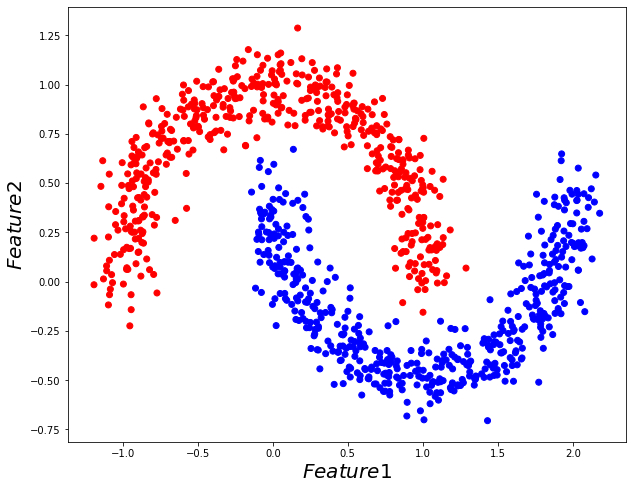

In [32]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize = (10, 8));
plt.scatter(feature[:,0],feature[:,1], c=target, cmap=cm_bright);
plt.xlabel("$Feature1$", fontsize=20);
plt.ylabel("$Feature2$", fontsize=20);
plt.show();

### Test and train

In [33]:
X_trn, X_tst, y_trn, y_tst = train_test_split(feature, target,random_state=8)

### SVM with polynomial kernel

In [34]:
clf_poly = SVC(kernel='poly', C=1.0, gamma=0.1)
start = time()
clf_poly.fit(X_trn, y_trn)
print("Polynomial Kernel Train Fit Time: {} s".format(time() - start))
start = time()
clf_poly.predict(X_tst)
print("Polynomial Kernel Predict Fit Time: {} s".format(time() - start))
print('Test Accuracy:',accuracy_score(y_tst, clf_poly.predict(X_tst)))

Polynomial Kernel Train Fit Time: 0.01300048828125 s
Polynomial Kernel Predict Fit Time: 0.004000425338745117 s
Test Accuracy: 0.72


### Transforming the data

In [35]:
transformed_data =np.array([feature[:,0]**2,feature[:,1]*feature[:,0]**2,feature[:,1]**2]).T

### Lets plot the transformed data

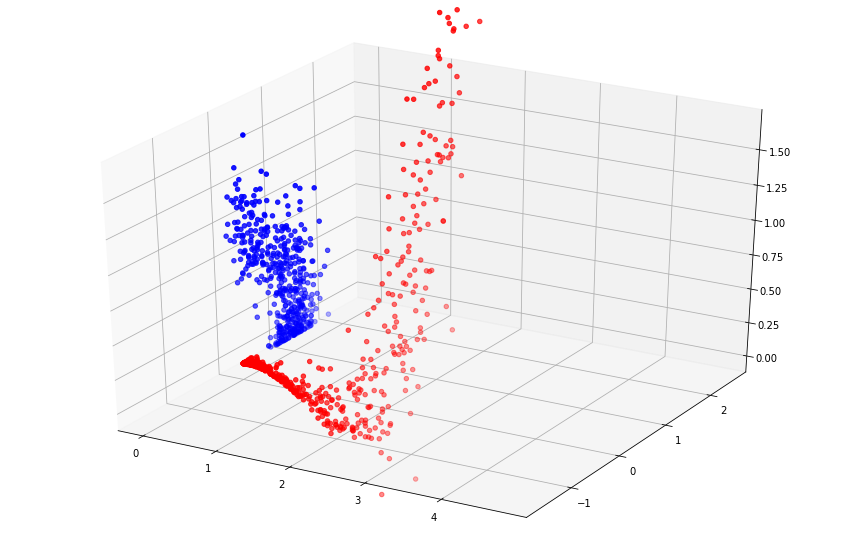

In [36]:
X1 = transformed_data[:,0]
X2 = transformed_data[:,1]
X3 = transformed_data[:,2]
fig = plt.figure(figsize = (15, 10));
ax = plt.axes(projection='3d')
ax.scatter(X1[target==0],X2[target==0],X3[target==0],c='blue',zdir='-y');
ax.scatter(X1[target==1],X2[target==1],X3[target==1],c='red',zdir='-x');

### Train and test from transformed data

In [37]:
X_train_tran, X_test_tran, y_train_tran, y_test_tran = train_test_split(transformed_data, target, random_state=8)

### SVM on transformed data without kernel

In [38]:
clf = SVC(C=1.0, gamma=0.1)
start = time()
clf.fit(X_train_tran, y_train_tran)
print("Transformed data with Linear Kernel Train Fit Time: {} s".format(time() - start))
start = time()
clf.predict(X_test_tran)
print("Transformed data with Linear Kernel Predict Time: {} s".format(time() - start))
print('Test Accuracy:',accuracy_score(y_test_tran, clf.predict(X_test_tran)))

Transformed data with Linear Kernel Train Fit Time: 0.009000539779663086 s
Transformed data with Linear Kernel Predict Time: 0.0020003318786621094 s
Test Accuracy: 0.992


For smaller number of observations and larger number of features polynomial kernel is faster than transformed method. However, by increasing the number of observations in case the number of feature remains small transforming method seems to be faster.

# Q.7

In [39]:
param_grid = [{'kernel': ['poly'], 'C':[0.1,1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'degree':[1,2,3,4,5]},
              {'kernel': ['rbf'], 'C': [0.1,1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
              {'kernel':['sigmoid'], 'C': [0.1,1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print('Best Parameters:',clf.best_params_)
print('--------------------------------------------------')
print(classification_report(y_test, clf.predict(X_test)))


C:\ProgramData\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\ProgramData\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Q.8

### Graph Kernal

Graphs are natural data structures to model the relationships between structured objects,with nodes representing objects and edges the relations between themA graph kernel is a function that measures the similarity of two graphs.

Below is the example from https://ysig.github.io/GraKeL/latest/auto_examples/shortest_path.html  that shows the accuracy of graph kernel on MUTAG dataset.
Edge here is a node to the list of its neighbors, G is the list of edges of the graph (a list of tuples which each tuple corresponds to an edge). A graph is weighted if its edges have weights. 
A graph may contain node labels (here y).A node-attributed graph is a graph endowed with a function f:V→R that assigns real-valued vectors to the vertices of the graph.
One of the most popular graph kernels is the shortest path kernel which counts the number of shortest paths of equal length in two graphs 

MUTAG dataset contains 188 mutagenic aromatic and heteroaromatic nitro compounds, and the task is to predict whether or not each chemical compound has mutagenic effect on the Gram-negative bacterium Salmonella typhimurium.

In [40]:
# Loads the MUTAG dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G, y = MUTAG.data, MUTAG.target

# Splits the dataset into a training and a test set
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

# Uses the shortest path kernel to generate the kernel matrices
gk = ShortestPath(normalize=True)
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

# Uses the SVM classifier to perform classification
clf = SVC(kernel="precomputed")
clf.fit(K_train, y_train)
y_pred = clf.predict(K_test)

# Computes and prints the classification accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", str(round(acc*100, 2)) + "%")

Accuracy: 94.74%


Graph kernels and graph classification techniques are also used to enhance natural language processing tasks such as the task of text categorization. Text categorization is the problem of automatically assigning category labels to textual documents. 

Reference: http://www.jmlr.org/papers/volume11/vishwanathan10a/vishwanathan10a.pdf

https://arxiv.org/pdf/1806.02193.pdf

### String Kernal

String kernel is mostly used in text camparison and bioinformatics.The input is the document and we want to find a kernel that we can apply any of the standard kernel to the text files. The problem is that the texts cannot be represented as explicit feature vectors and we use this kernel to extract the feature. The kernel function is an inner product that measures the similarity.
In text comparison it finds how similar for example two tests are. One method for that is comparing the substrings in texts and the more substrings in common the more similarity between the texts. In this case the substrings do not necesserily need to be continuous and we can define the degree of being continuous by appltying the weight. For example the words "car" and "capture" both have "c","a" and "r" but with different weights. To have those weights there is parameter called decay factor that can be used to weight the presence of a certain feature in a text.
For example, assume we have a text containing the words :("car","cat","hat"). The kernel("car","cat") for 2 substrings would be as follow:

$ca$  , $cr$ ,  $at$ ,  $ct$ ,  $ha$ ,  $ht$

$\phi(car):$  $\lambda^2$  $\lambda^3$  $0$  $0$  $0$  $0$


$\phi(cat):$  $\lambda^2$  $0$  $\lambda^2$  $\lambda^3$  $0$  $0$


$\phi(hat):$  $0$  $0$  $\lambda^2$  $0$  $\lambda^2$  $\lambda^3$

$K("car","cat") = \phi(car).\phi(cat) = \lambda^2*\lambda^2 = \lambda^4$  

or $K("hat","hat") = 2\lambda^4 + \lambda^3$

Let $\sum$ be the alphabet, and string be a finite sequence of characters from alphabet with the lenght $|s|$. And the sequence is the vector of indecies in ascending which sets up the letter of a sequence.
The feature mapping will be as follow:

$\phi(s) = \sum(\lambda^{l_i})$

The feature measures the number of occurance of subsequences and weight them according to their length. 

However, computing kernels with larger substrings to compare texts is not computationally effective and some use string subsequence kernel instead.

For effective computation of such a kernel they define a function to help the recursive computation for the kernel.
However, this kernel using sequence of words rather than characters, uses non continuous string subsequences, computationally time intensive but still less intensive method.

Reference : http://www.jmlr.org/papers/volume2/lodhi02a/lodhi02a.pdf

### Sigmoid Kernel

The Sigmoid kernel, which, despite its wide use, is not positive semi-definite for certain values of its parameters.
Slope and intercept are two hyper parameters in the sigmoid kernel. 
Sigmoid kernels de-emphasize extreme correlation. In a way they behave a bit like correlation coefficients emphasizing similarity in orientation. "c" or intercept shifts the operating point on the sigmoid, affecting the relative emphasis of the angle between the inputs. Sigmoid kernels also behave like RBFs for certain parameters as they are positive semi definite. This makes them suited to nonlinear classification.

In [41]:
X = feature
y = target
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [42]:
clf_sgm = SVC(kernel="sigmoid", gamma=1, C=.01)
start = time()
clf_sgm.fit(X_train, y_train)
print("Sigmoid Kernel Train Fit Time: {} s".format(time() - start))
start = time()
clf_sgm.predict(X_test)
print("Sigmoid Kernel Predict Time: {} s".format(time() - start))
print('Test Accuracy:',accuracy_score(y_test, clf_sgm.predict(X_test)))

Sigmoid Kernel Train Fit Time: 0.01500082015991211 s
Sigmoid Kernel Predict Time: 0.009000539779663086 s
Test Accuracy: 0.8175


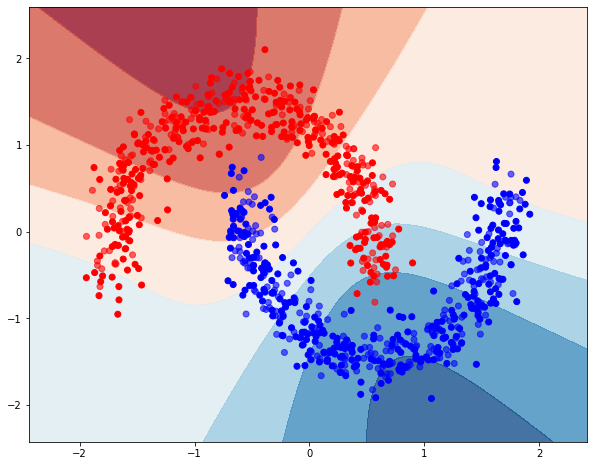

In [43]:
Z = clf_sgm.decision_function(np.c_[xx.ravel(), yy.ravel()])
score = clf_sgm.score(X_test, y_test)
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10, 8));
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6)

plt.show()